In [3]:
import pandas as pd

df = pd.read_csv('C:\\Users\Boss\Desktop\Birthweight.csv')

In [48]:
pd.set_option('display.max_rows', 140)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width',600)
print(df.head())

   headcirumference  length  weight  smoker  motherage LowBirthWeight
0                12      17     5.8       0         24            Low
1                12      19     4.2       1         20            Low
2                13      19     6.4       0         26         Normal
3                12      18     4.5       1         41            Low
4                13      18     5.8       1         20            Low


In [41]:
df['weight'].describe() #quartiles, min, max, standart deviation

count    42.000000
mean      7.264286
std       1.329739
min       4.200000
25%       6.450000
50%       7.250000
75%       8.000000
max      10.000000
Name: weight, dtype: float64

In [42]:
df['weight'].median() # median

7.25

In [44]:
df['weight'].var() #variation

1.7682055749128918

In [45]:
df['weight'].std()/df['weight'].mean() #variation coefficient

0.183051571016204

In [9]:
df['weight'].max()-df['weight'].min() #variation range

5.8

In [10]:
df["weight"].quantile(0.75)-df["weight"].quantile(0.25) #quantile range

1.549999999999999

In [11]:
df["weight"].quantile([0.1,0.9]) #deciles

0.1    5.80
0.9    8.87
Name: weight, dtype: float64

In [46]:
df['weight'].skew() #coef assymetry

-0.058529206194439666

In [47]:
df['weight'].kurtosis() #coef excess

0.009927216084536283

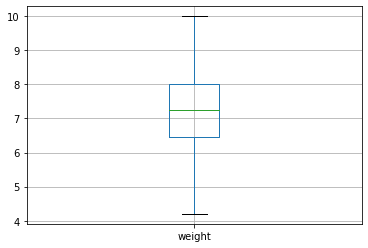

In [14]:
box=df.boxplot(column='weight')

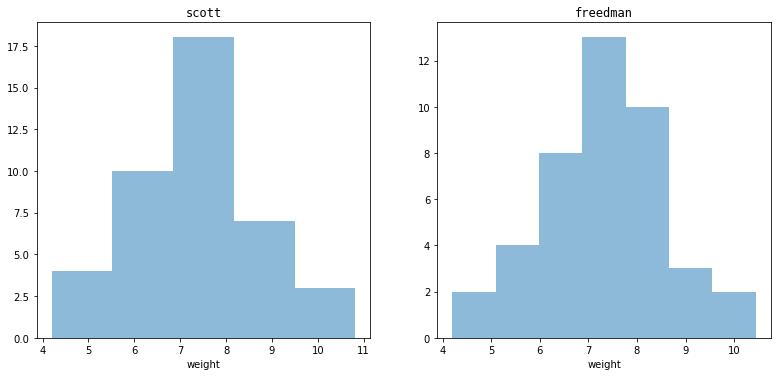

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, bins in enumerate(['scott', 'freedman']):
    hist(df["weight"], bins=bins, ax=ax[i], histtype='stepfilled',
         alpha=0.5, density=False)
    ax[i].set_xlabel('weight')
    ax[i].set_ylabel('')
    ax[i].set_title('{0}'.format(bins),
                    fontdict=dict(family='monospace'))

Text(0.5, 0, 'weight')

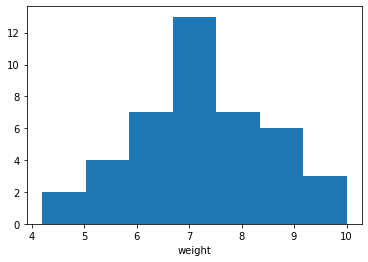

In [16]:
plt.hist(df["weight"], bins='sturges')
plt.xlabel("weight")


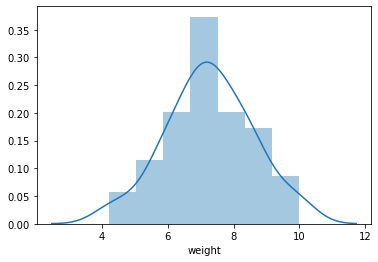

In [17]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(df['weight'])
plt.show()

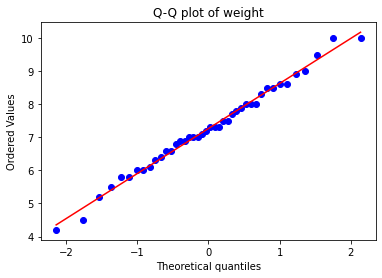

In [32]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df['weight'], dist="norm", plot=pylab)
pylab.title("Q-Q plot of weight")
pylab.show()

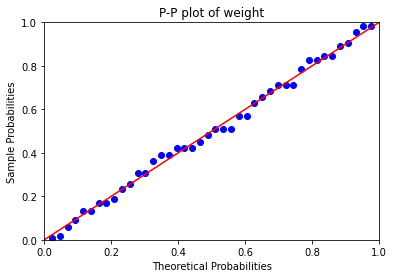

In [30]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

pp = sm.ProbPlot(df['weight'])
pp.ppplot(line="45")
plt.title("P-P plot of weight")
plt.show()

In [40]:

from scipy.stats import shapiro
data = df['weight']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.958
Sample looks Gaussian (fail to reject H0)
